# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [2]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# from src.call import call_on_students

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

In [ ]:
# call_on_students(1)

#### Answer: 

- PCA (Principal Componet Analysis)
- Reduces Dimensionality of data by identifying the principal compnents that capture the most variance in the data.
- This is done via eigendecomposition (variance explained)
- eigenvectors (component weights)
- the first principal compnent captures the direction the greataest variance in the data
- Accomplishes this via eigendecompostion



### 2: What are some reasons to use PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- Lots of features and we want to reduce the dimensionality or reduce complexity
- Noise reduction
- principal components are orthogonal to eachother (right angles) --> this will eliminate all multicolinearity
- can help visualize structure of large datasets

CON:
- Lose a bit of interpretability


### 3: Why is scaling important for PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- PCA ia affected by distance so we need to scale 
- Ensures all the features are in the same scale, otherwise features will be weighted differently 

PCA is based on distance within variance, meaning large variance sizes will be disproporionately favored by PCA unless they are standard scaled


### 4: How can one determine how many principle components to use in a model?

In [ ]:
# call_on_students(1)

#### Answer: 

- .explained_variance_ratio_
- set the number of components to be based on the percentage of variance we want to explain
- could also hard set based on an interger value
- for visualization only need 2 or 3
- We could look at the explained variance (cumsum()) and find where we start having diminshing returns


pca_transformer = PCA(n_components=.95, svd_solver='full', random_state=42)


## PCA in Code

### Set Up

In [62]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- Dropping Nulls
- Scale



In [63]:
# call_on_students(1)

In [64]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
X_sc

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [65]:
# call_on_students(1)

In [66]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA
pca_transformer = PCA(n_components=.95, random_state=42)
pca_transformer.fit_transform(X_sc)

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.39840723,
        -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.24098846,
        -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737374,
         0.02406564,  0.4542754 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188704,
         0.39391682,  0.52087738],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023861,
        -0.54203454, -0.08929612],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635352,
         0.37410111, -0.04772557]])

### 7: How Much Variance is Explained by the First 2 Components?

In [67]:
# call_on_students(1)

In [68]:
# Code here to answer the question
pca_transformer.explained_variance_ratio_[:2].cumsum()

array([0.44272026, 0.63243208])

#### Answer:

- 63%


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [ ]:
# call_on_students(1)

#### Answer:

- Set initial number of clusters (centroids) based on K number (n_clusters). Randomly assign to data points
- Calculate distance from each centroid to every data point
- Assign data points to their closest centroid
- Adjust the centroid based on the mean of all the data points assigned to it
- Remeasure distances, and reassign points to closest as needed
- Repeat this process skipping step one, until centroids no longer move or we hit a set tolerance

- We can try again with new starting centroids
- Algorithm will pick th eresult that minimaizes intra-cluster distance and maximizes our inter-cluster (between) distance

### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# call_on_students(1)

#### Answer:

- Inertia is used to evaalute the quality of clusters in K-Means clustering
- Inertia is the sum of squared distances of samples to their closest cluster centeer
- Use interia to plot the distortions, creates the elbow plot 

- Elbow plot 
- uses sum of squared errors

### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [ ]:
# call_on_students(1)

#### Answer:

- Silhouette coefficient, silhouette score
- Ranges b/t -1 and 1, closer to 1 denotes 'better' clustering
- Looks at a measure of bboth intra and inter cluster distance


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [69]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- Remove nulls
- Scale data


In [70]:
# call_on_students(1)

In [71]:
# Code to preprocess the data
# Name the processed data X_processed
clus_scaler = StandardScaler()
X_processed = clus_scaler.fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [72]:
# call_on_students(1)

In [81]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering
hac = AgglomerativeClustering()

In [82]:
# Fit the object
hac.fit(X_processed)

AgglomerativeClustering()

In [75]:
# Calculate a silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X_processed, hac.labels_)

0.5770346019475988

2: 0.5770346019475988
3: 0.4466890410285909
4: 0.4006363159855973
5: 0.33058726295230545
6: 0.3148548010051283
7: 0.31696983029912795
8: 0.31094652900725794

Best n_cluster = 2


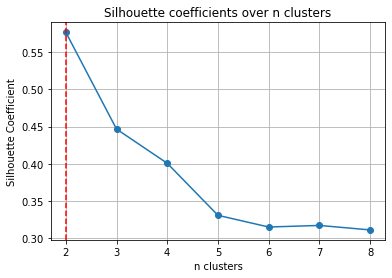

In [114]:
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import numpy as np
def clusters(data, rmax=10):
    silhouette_scores = []
    for j in range(2,rmax):
        cluster = AgglomerativeClustering(n_clusters=j).fit(data) 
        sil = silhouette_score(data, cluster.labels_)
        silhouette_scores.append(sil)
        print(f'{j}: {sil}')  
    print(f'\nBest n_cluster = {np.argmax(silhouette_scores)+2}') 
    
    
    # Plot function
    def plotting(ydata, xlabel, ylabel, title, line_type=None, xdata=range(2,rmax)):
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(xdata, ydata, marker='o')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.grid(True)
    # Silhouette line
        if line_type == 'sil':
            ax.axvline(x=(np.argmax(silhouette_scores)+2), color='r', linestyle='--')
    # Plots
    plotting(silhouette_scores, 'n clusters', 'Silhouette Coefficient',
             'Silhouette coefficients over n clusters', 'sil')
    
clusters(X_processed, 9)

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [115]:
# call_on_students(1)

In [116]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Fit the new clustering model
    cluster = AgglomerativeClustering(n_clusters=n)
    cluster.fit(data) 
       
    # Print the silhouette score
    print(silhouette_score(data, cluster.labels_))
    # Return the labels attribute from the fit clustering model
    return cluster.labels_
    pass

In [117]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

0.5770346019475988
0.4466890410285909
0.4006363159855973
0.33058726295230545
0.3148548010051283
0.31696983029912795
0.31094652900725794


# 3) Time Series

In [136]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- set date as the index and datetime object


In [138]:
# call_on_students(1)


In [139]:
# aps['Month'] = pd.to_datetime(ap['Month'])
aps = pd.Series(ap['#Passengers'].values, index=pd.to_datetime(ap['Month']))
aps

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Length: 144, dtype: int64

In [140]:
# Code here 
ap = ap.set_index(pd.to_datetime(ap['Month']))
ap = ap.drop(columns='Month')
ap

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### 15: Explore Patterns in the Data

In [ ]:
# call_on_students(1)

First: what kinds of patterns can one find in time series data?

- Seasonality / Periodicity
- Cyclic (unpredicable periods)
- Trends (upward or downwaard movement of the mean)
- Irregularity (random flucuations in variance)



Second, plot this time series data. What kinds of patterns do you see in this dataset?

<AxesSubplot:ylabel='Density'>

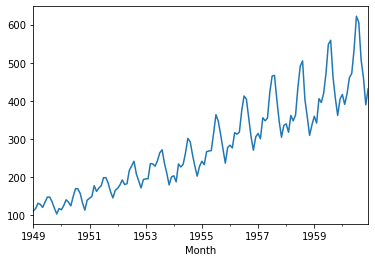

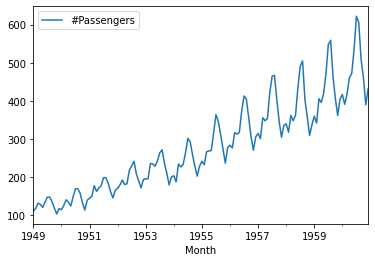

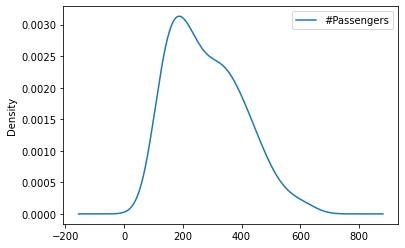

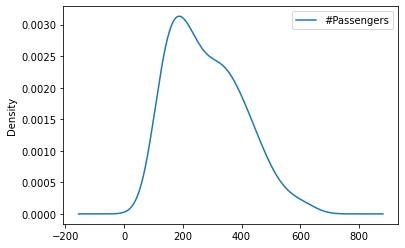

In [170]:
# Code to plot the time series
aps.plot(kind='line')
ap.plot(kind='line')
ap.plot(kind='density')
ap.plot(kind='kde')

# ap.plot(kind='pie', subplots=True, legend=False)

### 16: Explore the Moving Average

What window would make sense to use for this data?

- There is a moving average, lineaar positive trend and annaul seasonality
    - Also some heterness going on in variance
- Based on the seasonality we should do 12

window = 12 = yearly moving average


In [ ]:
# call_on_students(1)

In [174]:
# Code to create the moving average
m_avg = ap.rolling(window=12).mean()

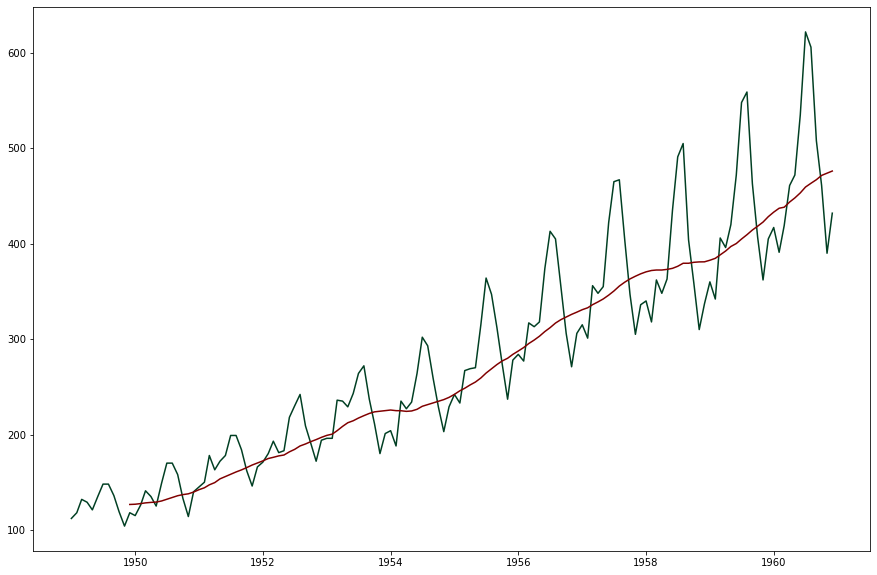

In [206]:
# Add to the moving average to the above plot
plt.figure(figsize=(15, 10))
dr = (0.5, 0, 0) # Dark_red
dg = (0.003, 0.247, 0.137) #Dark_green
plt.plot(ap,color=dg)
plt.plot(m_avg, color=dr)

### 17: Explore Stationarity


In [ ]:
# call_on_students(1)

Why do we try to make our data stationary?

- So the values are not dependeent on time (date)

What does that mean?
- The mean, variance, and covariance of the time series to not change over time


What can we do to make our data stationary?

- We can differnce it .diff()



### 18: Check Stationarity

In [257]:
# call_on_students(1)

False Is Not Stationary


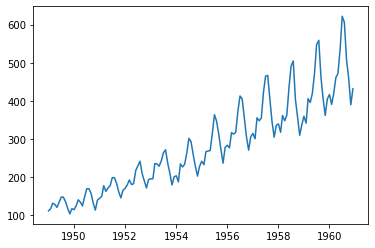

In [298]:
# Code here to check if the data is stationary
from statsmodels.tsa.stattools import adfuller

def stationary(*args):
    pv = []
    for data in args:
        if adfuller(data)[1]< .05:
            print(f'{adfuller(data)[1]< .05} With a pvlaue of {adfuller(data)[1]}\n')
            pv.append(adfuller(data)[1])
        else:
            print(f'{False} Is Not Stationary')
            
        plt.plot(data);
    if pv:
        print(f'Best score:{min(pv)}')
    
stationary(ap)

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [299]:
# call_on_students(1)

In [300]:
# Code here to try to make the data stationary
diff_ts = ap.diff(2).dropna()
sq_ts = np.sqrt(ap.dropna())
sq_diff = sq_ts.diff(1).dropna()
sq_diff2 = sq_ts.diff(2).dropna()

True With a pvlaue of 0.03862975767698862

True With a pvlaue of 0.020784185571267887

True With a pvlaue of 0.014237493115870976

Best score:0.014237493115870976


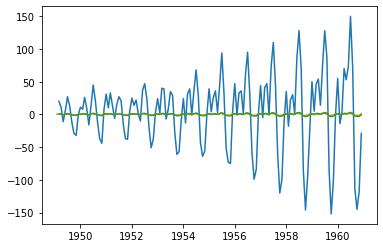

In [307]:
# Code here to check if the data is stationary
stationary(diff_ts, sq_diff, sq_diff2)

def pltplots(*args):
    for data in args:
        plt.plot(data);
        
# pltplots(diff_ts, sq_diff, sq_diff2)

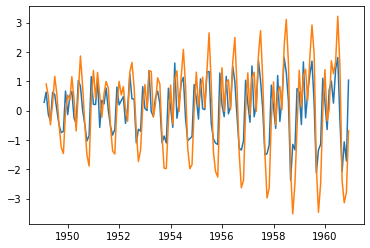

In [308]:
pltplots(sq_diff, sq_diff2)

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [296]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [297]:
# call_on_students(1)

#### Answer:

1. Tokenize
2. Stem or lemmatize
3. Lowercase
4. Remove Punctuation
5. Remove Stopwords (common words)

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- Columns: words (or tokens) from the corpus aka our 'features'
- Rows: each unique document from the corpus is a row
- Counts or Score would be the values


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- Term Frequency - Inverse Document Frequency
- Uses freequency of words within the document (TF) and across our full corpus to determine the importance or 'rarity' of the token
- Score of importance for that token to a specific document

## NLP in Code

### Set Up

In [313]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [314]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [311]:
# call_on_students(1)

In [321]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(policies['policy'],policies['candidate'], random_state=42)

In [328]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [331]:
# Instantiate it
vector = CountVectorizer(stop_words=stopwords.words('english'))

In [332]:
# Fit it
vector.fit(X_train)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

### 24: Vectorize Your Text, Then Model

In [333]:
# call_on_students(1)

In [334]:
# Code here to transform train and test sets with the vectorizer
tran_x_test = vector.transform(X_test)
tran_x_train = vector.transform(X_train)

In [377]:
tran_x_train.todense()

matrix([[3, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [6, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [381]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Fores model
rfm = RandomForestClassifier()
rfm.fit(tran_x_train,y_train)

RandomForestClassifier()

In [383]:
# Code here to evaluate your model on the test set
print(rfm.score(tran_x_train, y_train))
print(rfm.score(tran_x_test, y_test))

1.0
0.9375
